In [23]:
import numpy as np
import matplotlib.pyplot as plt

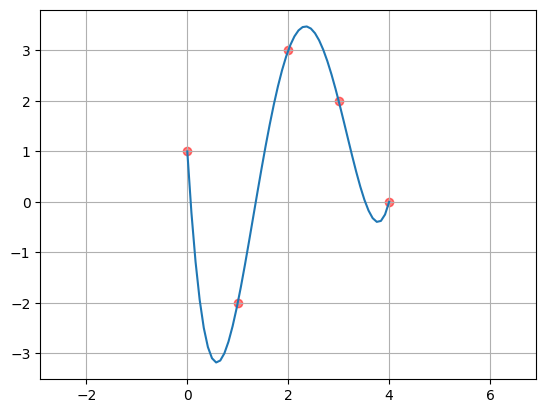

In [57]:
X = np.array([0, 1, 2, 3, 4])
Y = np.array([1,-2, 3, 2, 0])

def get_function_5(X, Y):
    R = np.array([
        [1,  X[0], pow(X[0],2), pow(X[0],3),pow(X[0],4)],
        [1,  X[1], pow(X[1],2), pow(X[1],3),pow(X[1],4)],
        [1,  X[2], pow(X[2],2), pow(X[2],3),pow(X[2],4)],
        [1,  X[3], pow(X[3],2), pow(X[3],3),pow(X[3],4)],
        [1,  X[4], pow(X[4],2), pow(X[4],3),pow(X[4],4)],
    ])
    A = np.linalg.solve(R,Y)

    linsp  = np.linspace(X.min(), X.max())   # Множество значений от X.min() до X.max() (с шагом 50 по умолчанию)
    f = np.poly1d(np.flip(A)) # Создаем поллином при помощи встроенной функции np.poly1d
    fun = [f(x) for x in linsp] # Создаем точки для построения графика
    return linsp, fun

linsp, fun = get_function_5(X, Y)

plt.plot(linsp,fun); # Рисуем график
plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.axis('equal') # Делаем одинаковые оси
plt.grid(True) # Рисуем сетку

1234510111220212223343564767778798788899495969798

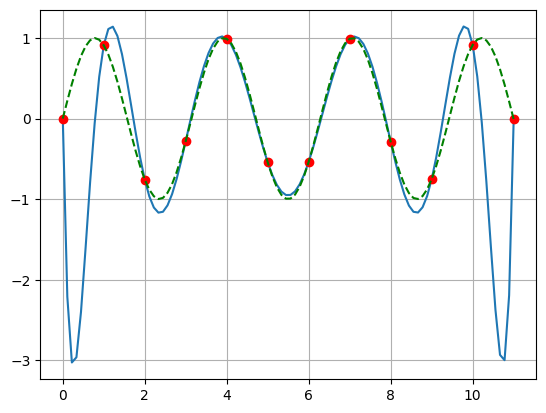

In [58]:
n = 12

X = np.arange(n)
Y = np.sin(2 * X)

R = np.empty([n, n])

for i in range(n):
  for j in range(n):
    R[i][j] = X[i]**j


A = np.linalg.solve(R, Y)
linsp = np.linspace(X.min(), X.max(), num=100)
f = np.poly1d(np.flip(A))

fun = [f(x) for x in linsp]

plt.plot(linsp, fun)
plt.plot(X, Y, 'ro')
plt.plot(linsp, np.sin(2*linsp), 'g--')

plt.grid(True)

for i in range(len(linsp)):
  if abs(fun[i]) > 1:
    print(i, end='')

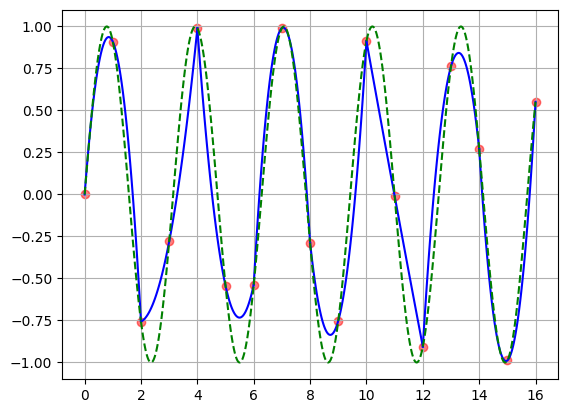

In [59]:
n = 17
X = np.arange(n)
Y = np.sin(2*X)

# Функция для получения полинома 2 степени для трех точек
def get_function_2(X, Y):
    A = np.vstack([X**2, X, np.ones(len(X))]).T
    a, b, c = np.linalg.lstsq(A, Y, rcond=None)[0]

    linsp = np.linspace(X[0], X[-1], 100)
    fun = a*linsp**2 + b*linsp + c

    return linsp, fun

# Применим функцию get_function_2() к каждому набору трех точек:
for i in range(0, n-2, 2):
    linsp, fun = get_function_2(X[i:i+3], Y[i:i+3])
    plt.plot(linsp, fun, 'b') # Полином 2 степени
    plt.plot(linsp, np.sin(2*linsp), 'g--') # Истинная функция

plt.scatter(X, Y, color='r', alpha=0.5) # Рисуем исходные точки
plt.grid(True)
plt.show()

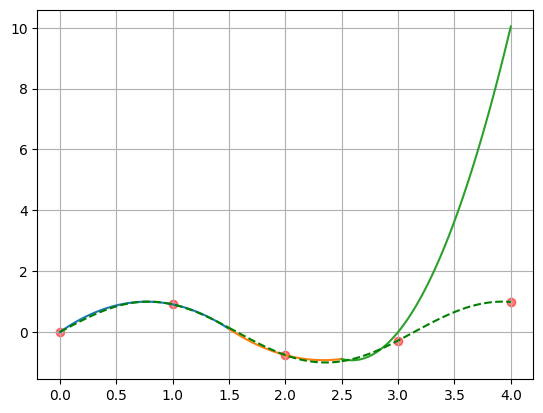

In [63]:
n = 5
X = np.arange(n)
Y = np.sin(2*X)

T1 = (X[1] + X[2]) / 2
T2 = (X[2] + X[3]) / 2
R = np.array([
    [1, X[0], X[0]**2, 0, 0, 0, 0, 0, 0],
    [1, X[1], X[1]**2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, X[2], X[2]**2, 0, 0, 0],
    [0, 0, 0, 1, X[3], X[3]**2, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, X[2], X[2]**2],
    [0, 0, 0, 0, 0, 0, 1, X[3], X[3]**2],
    [1, T1, T1**2, -1, -T1, -T1**2, 0, 0, 0],
    [0, 1, 2*T1, 0, -1, -2*T1, 0, 0, 0],
    [0, 0, 0, 1, T2, T2**2, -1, -T2, -T2**2],
])

Z = np.hstack([Y, [0, 0, 0, 0]])

A = np.linalg.solve(R, Z)

linsp1 = np.linspace(X.min(), T1)
f1 = np.poly1d(np.flip(A[0:3]))
fun1 = [f1(x) for x in linsp1]
plt.plot(linsp1, fun1)

linsp2 = np.linspace(T1, T2)
f2 = np.poly1d(np.flip(A[3:6]))
fun2 = [f2(x) for x in linsp2]
plt.plot(linsp2, fun2)

linsp3 = np.linspace(T2, X.max())
f3 = np.poly1d(np.flip(A[6:]))
fun3 = [f3(x) for x in linsp3]
plt.plot(linsp3, fun3)

plt.plot(linsp1, np.sin(2*linsp1), 'g--')
plt.plot(linsp2, np.sin(2*linsp2), 'g--')
plt.plot(linsp3, np.sin(2*linsp3), 'g--')

plt.scatter(X, Y, color='r', alpha=0.5)  # Рисуем исходные точки
plt.grid(True)
plt.show()


In [46]:
import numpy as np
import matplotlib.pyplot as plt

n = 5  # Произвольное число точек
X = np.arange(n)
Y = np.sin(2*X)

Ts = [(X[i] + X[i+1]) / 2 for i in range(n-1)]

# Формируем матрицу R
R = np.zeros((2*n-3, n+2))  # Создаем нулевую матрицу нужного размера

plt.plot(R[i*2, i:i+3])

for i in range(n-1):
    R[i*2, i:i+3] = [1, X[i], X[i] ** 2]
    R[i*2 + 1, i:i+3] = [0, 1, 2*X[i]]

R[2*(n-1), 2:4] = [1, Ts[0], Ts[0]**2]
R[2*(n-1)+1, -2:] = [-1, -Ts[-1], -Ts[-1]**2]

# Решаем систему уравнений
Z = np.hstack([Y, np.zeros(n-1)])
A = np.linalg.solve(R, Z)

# Строим сплайны
linsp = np.linspace(X.min(), Ts[0])
f = np.poly1d(np.flip(A[0:3]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)

for i in range(n-2):
    linsp = np.linspace(Ts[i], Ts[i+1])
    f = np.poly1d(np.flip(A[3*i+3:3*i+6]))
    fun = [f(x) for x in linsp]
    plt.plot(linsp, fun)

linsp = np.linspace(Ts[-1], X.max())
f = np.poly1d(np.flip(A[-3:]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)

# Добавляем исходные точки и график sin(2x)
plt.scatter(X, Y, color='r', alpha=0.5)
plt.plot(linsp, np.sin(2*linsp), 'g--')

plt.grid(True)
plt.show()


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

n = 6  # Произвольное количество точек
X = np.arange(n)
Y = np.sin(2*X)

# Определяем положения узлов пересечения
Ts = [(X[i] + X[i+1]) / 2 for i in range(n-1)]

# Формируем матрицу R
R = np.zeros((2*n-3, n+2))

for i in range(n-1):
    R[i*2, i:i+3] = [1, X[i], X[i] ** 2]
    R[i*2 + 1, i:i+3] = [0, 1, 2*X[i]]

R[2*(n-1), 2:4] = [1, Ts[0], Ts[0]**2]
R[2*(n-1)+1, -2:] = [-1, -Ts[-1], -Ts[-1]**2]

# Решаем систему уравнений
Z = np.hstack([Y, np.zeros(n-1)])
A = np.linalg.solve(R, Z)

# Строим график
for i in range(n-1):
    linsp = np.linspace(X[i], X[i+1], num=100)
    f = np.poly1d(np.flip(A[3*i:3*i+3]))
    fun = [f(x) for x in linsp]
    plt.plot(linsp, fun)

# Отображаем исходные точки и sin(2x)
plt.scatter(X, Y, color='r', alpha=0.5)
plt.plot(X, np.sin(2*X), 'g--')

plt.grid(True)
plt.show()


IndexError: index 8 is out of bounds for axis 1 with size 8

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем произвольное количество точек
n = 6
X = np.arange(n)
Y = np.sin(2*X)

# Создаем массив средних точек между узлами
Ts = [(X[i] + X[i+1]) / 2 for i in range(n-1)]

# Создаем матрицу R
R = np.zeros((2*(n-1), n+2))

for i in range(n-1):
    R[i*2, i:i+3] = [1, X[i], X[i] ** 2]
    R[i*2 + 1, i:i+3] = [0, 1, 2*X[i]]

    R[2*(n-1), 2:4] = [1, Ts[0], Ts[0]**2]
    R[2*(n-1) + 1, -2:] = [-1, -Ts[-1], -Ts[-1]**2]

# Решаем систему линейных уравнений
Z = np.hstack([Y, np.zeros(n-2)])
A = np.linalg.solve(R, Z)

# Строим график сплайна
for i in range(n-1):
    linsp = np.linspace(X[i], X[i+1], num=100)
    f = np.poly1d(np.flip(A[3*i:3*i+3]))
    fun = [f(x) for x in linsp]
    plt.plot(linsp, fun)

# Отображаем исходные точки и sin(2x)
plt.scatter(X, Y, color='r', alpha=0.5)
plt.plot(X, np.sin(2*X), 'g--')

plt.grid(True)
plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем количество точек и создаем массив X с индексами точек
n = 5
X = np.arange(n)

# Создаем массив Y с соответствующими значениями функции sin(2x) для каждой точки X
Y = np.sin(2*X)

# Находим среднюю точку между второй и третьей точкой
T = (X[1] + X[2]) / 2

# Формируем матрицу R, где каждая строка содержит коэффициенты полиномов для каждого отрезка
R = np.array([
    [1, X[0], X[0]**2, 0, 0, 0],
    [1, X[1], X[1]**2, 0, 0, 0],
    [0, 0, 0, 1, X[2], X[2]**2],
    [0, 0, 0, 1, X[3], X[3]**2],
    [1, T, T**2, -1, -T, -T**2],
    [0, 1, 2*T, 0, -1, -2*T]
])

# Создаем вектор Z, объединяя значения Y и два нуля для граничных условий
Z = np.hstack([Y, [0, 0]])

# Решаем систему линейных уравнений полученную из матрицы R и вектора Z
A = np.linalg.solve(R, Z)

# Создаем прямые для квадратичного сплайна для первой части отрезка
linsp = np.linspace(X.min(), T)
f = np.poly1d(np.flip(A[0:3]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)
plt.plot(linsp, np.sin(2*linsp), 'g--')

# Создаем прямые для квадратичного сплайна для второй части отрезка
linsp = np.linspace(T, X.max())
f = np.poly1d(np.flip(A[3:]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)
plt.plot(linsp, np.sin(2*linsp), 'g--')

# Отображаем исходные точки на графике, точки Y красным цветом с прозрачностью 0.5
plt.scatter(X, Y, color='r', alpha=0.5)

# Включаем сетку на графике
plt.grid(True)

# Отображаем график
plt.show()


ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 7 is different from 6)

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем произвольное количество точек
n = 5
X = np.arange(n)
Y = np.sin(2*X)

# Создаем массив средних точек между узлами
Ts = [(X[i] + X[i+1]) / 2 for i in range(n-1)].T

# Создаем матрицу R
R = np.zeros((2*(n-1), n+2))

for i in range(n-1):
    R[i*2, i:i+3] = [1, X[i], X[i] ** 2]
    R[i*2 + 1, i:i+3] = [0, 1, 2*X[i]]

R[2*(n-1), 2:4] = [1, Ts[0], Ts[0]**2  ]
R[2*(n-1) + 1, -2:] = [-1, -Ts[-1], -Ts[-1]**2]

# Решаем систему линейных уравнений
Z = np.hstack([Y, np.zeros(n-2)])
A = np.linalg.solve(R, Z)

# Строим график сплайна
for i in range(n-1):
    linsp = np.linspace(X[i], X[i+1], num=100)
    f = np.poly1d(np.flip(A[3*i:3*i+3]))
    fun = [f(x) for x in linsp]
    plt.plot(linsp, fun)

# Отображаем исходные точки и sin(2x)
plt.scatter(X, Y, color='r', alpha=0.5)
plt.plot(X, np.sin(2*X), 'g--')

plt.grid(True)
plt.show()
1

AttributeError: 'list' object has no attribute 'T'

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем количество точек и создаем массив X с индексами точек
n = 6
X = np.arange(n)

# Создаем массив Y с соответствующими значениями функции sin(2x) для каждой точки X
Y = np.sin(2*X)

# Находим среднюю точку между второй и третьей точкой
T = (X[1] + X[2]) / 2

# Формируем матрицу R, где каждая строка содержит коэффициенты полиномов для каждого отрезка

R = np.zeros((2*(n), n+3))

for i in range(n-1):
    R[i*2, i:i+3] = [1, X[i], X[i] ** 2]
    R[i*2 + 1, i:i+3] = [0, 1, 2*X[i]]

R[2*(n-1), 2:4] = [1, Ts[0], Ts[0]**2]
R[2*(n-1) + 1, -2:] = [-1, -Ts[-1], -Ts[-1]**2]

# Создаем вектор Z, объединяя значения Y и два нуля для граничных условий
Z = np.hstack([Y, [0, 0]]).T

# Решаем систему линейных уравнений полученную из матрицы R и вектора Z
A = np.linalg.solve(R, Z)

# Создаем прямые для квадратичного сплайна для первой части отрезка
linsp = np.linspace(X.min(), T)
f = np.poly1d(np.flip(A[0:3]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)
plt.plot(linsp, np.sin(2*linsp), 'g--')

# Создаем прямые для квадратичного сплайна для второй части отрезка
linsp = np.linspace(T, X.max())
f = np.poly1d(np.flip(A[3:]))
fun = [f(x) for x in linsp]
plt.plot(linsp, fun)
plt.plot(linsp, np.sin(2*linsp), 'g--')

# Отображаем исходные точки на графике, точки Y красным цветом с прозрачностью 0.5
plt.scatter(X, Y, color='r', alpha=0.5)

# Включаем сетку на графике
plt.grid(True)

# Отображаем график
plt.show()


ValueError: could not broadcast input array from shape (3,) into shape (2,)